In [1]:
pip uninstall scikit-learn imbalanced-learn -y


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4300, 4500, 4800, 5000, 5300, 5500],
    'Class': ['Minority', 'Minority', 'Minority', 'Minority', 'Majority', 'Majority', 'Majority', 'Majority', 
              'Majority', 'Majority', 'Majority', 'Majority', 'Majority']
})

# Step 1: Convert categorical labels to numerical values (Majority -> 0, Minority -> 1)
df['Class'] = df['Class'].map({'Majority': 0, 'Minority': 1})

# Step 2: Split features (X) and target variable (y)
X = df[['Age', 'Income']]  # Features
y = df['Class']  # Target variable

# Step 3: Apply SMOTE with k_neighbors=3 (reducing from default 5)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Convert numeric labels back to categorical
y_resampled = y_resampled.map({0: 'Majority', 1: 'Minority'})

# Step 5: Combine the resampled dataset
df_resampled = pd.DataFrame(X_resampled, columns=['Age', 'Income'])
df_resampled['Class'] = y_resampled

# Print the balanced dataset
print(df_resampled)



    Age  Income     Class
0    22    2000  Minority
1    25    2500  Minority
2    27    2700  Minority
3    28    3200  Minority
4    30    3500  Majority
5    35    3800  Majority
6    40    4000  Majority
7    45    4300  Majority
8    50    4500  Majority
9    55    4800  Majority
10   60    5000  Majority
11   65    5300  Majority
12   70    5500  Majority
13   26    2668  Minority
14   25    2531  Minority
15   27    3159  Minority
16   27    3133  Minority
17   23    2199  Minority


# Types of Feature Selection Methods 

Type-E2-EdteLMethQds: 

Method = > Correlation, Chi-Square, Mutual Information. 

Description Rank features based on statistical tests. 

Type.E2-Wroppe.cMethQds 


Method = > Forward/Backward Selection, Recursive Feature Elimination (RFE) 

Description = > Train models with different feature subsets and select the best. 

Type-Q-Eméedded-MethQds 

Method = >Lasso Regression, Decision Trees  

Description =>Feature selection is built into the model training process. 










# **What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

# **Why Do We Need Feature Selection?**
*1.Reduces Overfitting 📉*

        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.

# **Types of Feature Selection Methods**
 
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 
 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
np.random.seed(42)

df = pd.DataFrame({
    'Size': np.random.randint(500, 5000, 100),  
    'Bedrooms': np.random.randint(1, 5, 100),  
    'Age': np.random.randint(1, 100, 100),  
    'Price': np.random.randint(10000, 500000, 100)  
})

print(df.head())

   Size  Bedrooms  Age   Price
0  1360         3    2  322252
1  4272         3    2  122296
2  3592         2   92  104179
3   966         2   54  100272
4  4926         4   87   48467


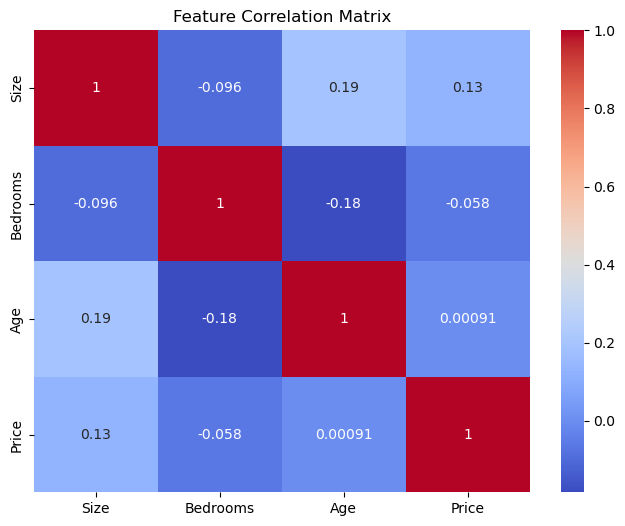

In [17]:

# Plot heatmap
plt.figure(figsize=(8, 6))  
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

plt.title("Feature Correlation Matrix")
plt.show()


In [18]:
# Step 3: Apply Recursive Feature Elimination (RFE) (Wrapper Method)
X = data.drop('Price', axis=1)  
y = data['Price'] 
# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Apply Recursive Feature Elimination (RFE) to select the top 2 features
rfe = RFE(model, n_features_to_select=2)  
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: Index(['Size', 'Age'], dtype='object')


In [22]:

# Step 4: Apply Lasso (Least Absolute Shrinkage and Selection Operator) Regression (Embedded Method)
lasso = Lasso(alpha=0.1)  
lasso.fit(X, y)

# Get feature importance (absolute values of the coefficients)
importance = np.abs(lasso.coef_)

# Select features based on importance
selected_features = X.columns[importance > 0.1]

# Print selected features
print("Selected Features using Lasso:", selected_features)


Selected Features using Lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')
